# **PART I: Data Preprocessing**

## 1.1 Data Import

In [ ]:
import pandas as pd
import numpy as np
import math 

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import model_selection
import statsmodels.api as sm
import statsmodels.formula.api as smf 

import scipy.stats as stats
import matplotlib
from matplotlib import pyplot as plt 
from matplotlib.collections import EllipseCollection 
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
!gdown https://drive.google.com/uc?id=1lMnchZVOsTT-8mguOc73RLhLOzERn2tN

Downloading...
From: https://drive.google.com/uc?id=1lMnchZVOsTT-8mguOc73RLhLOzERn2tN
To: /content/mobile_churn.csv
100% 277k/277k [00:00<00:00, 110MB/s]


In [ ]:
raw_data = pd.read_csv("mobile_churn.csv") 
raw_data.describe()

,AcctLength,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls
count,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000
mean,101.056723,8.093938,179.749490,100.432773,30.557953,200.981423,100.114646,17.083631,200.858884,100.110444,9.038733,10.237365,4.479892,2.764601,1.563025
std,39.825348,13.687287,54.455494,20.071412,9.257411,50.721418,19.925606,4.311311,50.575735,19.570910,2.275958,2.792256,2.461450,0.753885,1.315652
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.675000,87.000000,24.425000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.150000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.325000,114.000000,36.775000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
raw_data.head()

,Churn,State,AcctLength,IntlPlan,VMPlan,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls
0,False,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,False,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,False,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,False,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,False,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0


## 1.2 Missing Value and Outlier Detection

In [ ]:
raw_data.isnull().sum()

Churn                0
State                0
AcctLength           0
IntlPlan             0
VMPlan               0
NVMailMsgs           0
DayMinutes           0
DayCalls             0
DayCharge            0
EveMinutes           0
EveCalls             0
EveCharges           0
NightMin             0
NightCalls           0
NightCharge          0
IntlMin              0
IntlCalls            0
IntlCharge           0
NCustServiceCalls    0
dtype: int64

In [ ]:
raw_data['Churn']

0        False
1        False
2        False
3        False
4        False
         ...  
3327     False
3328     False
3329     False
3330     False
3331     False
Name: Churn, Length: 3332, dtype: object

In [ ]:
raw_data.Churn.describe()

count       3332
unique         2
top        False
freq        2849
Name: Churn, dtype: object

## 1.3 Descriptive analysis


*   Correlation
*   Distribution



In [ ]:
data = raw_data.copy()
data['Churn'] = data['Churn'].map(lambda x: 0 if (x == " False") else 1)
data['IntlPlan'] = data['IntlPlan'].map(lambda x: 0 if (x == " no") else 1)
data['VMPlan'] = data['VMPlan'].map(lambda x: 0 if (x == " no") else 1)
#data['Churn'] = data['Churn'].replace(to_replace = ["True","False"],value=[1,0])
data.head()

,Churn,State,AcctLength,IntlPlan,VMPlan,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls
0,0,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,0,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,0,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,0,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,0,AL,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0


In [ ]:
data.describe()
# NVMailMsgs has high std, which is consistent with skewed distribution of the data.

,Churn,AcctLength,IntlPlan,VMPlan,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls
count,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000
mean,0.144958,101.056723,0.096939,0.276411,8.093938,179.749490,100.432773,30.557953,200.981423,100.114646,17.083631,200.858884,100.110444,9.038733,10.237365,4.479892,2.764601,1.563025
std,0.352111,39.825348,0.295919,0.447289,13.687287,54.455494,20.071412,9.257411,50.721418,19.925606,4.311311,50.575735,19.570910,2.275958,2.792256,2.461450,0.753885,1.315652
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,74.000000,0.000000,0.000000,0.000000,143.675000,87.000000,24.425000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.150000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,0.000000,127.000000,0.000000,1.000000,20.000000,216.325000,114.000000,36.775000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,1.000000,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data['Churn'].value_counts() 
#unbalanced data

0    2849
1     483
Name: Churn, dtype: int64

In [ ]:
data_corr=pd.DataFrame(data.corr())
data_corr

,Churn,AcctLength,IntlPlan,VMPlan,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls
Churn,1.000000,0.016626,0.259822,-0.101991,-0.089598,0.205425,0.018519,0.205425,0.092789,0.009226,0.092780,0.035605,0.006084,0.035607,0.068230,-0.052923,0.068250,0.208708
AcctLength,0.016626,1.000000,0.024803,0.002591,-0.004880,0.005901,0.038377,0.005899,-0.006743,0.019273,-0.006731,-0.009133,-0.013083,-0.009137,0.009532,0.020786,0.009564,-0.003709
IntlPlan,0.259822,0.024803,1.000000,0.006168,0.008869,0.049569,0.003802,0.049571,0.019093,0.006108,0.019100,-0.028823,0.012406,-0.028831,0.045863,0.017308,0.045772,-0.024565
VMPlan,-0.101991,0.002591,0.006168,1.000000,0.956922,-0.002446,-0.011322,-0.002448,0.021588,-0.006420,0.021601,0.005661,0.015785,0.005646,-0.001277,0.007913,-0.001235,-0.017624
NVMailMsgs,-0.089598,-0.004880,0.008869,0.956922,1.000000,0.000198,-0.009727,0.000195,0.017592,-0.005845,0.017608,0.007362,0.007297,0.007345,0.002888,0.014184,0.002916,-0.013107
DayMinutes,0.205425,0.005901,0.049569,-0.002446,0.000198,1.000000,0.006529,1.000000,0.007078,0.015801,0.007065,0.003918,0.023201,0.003895,-0.010118,0.008320,-0.010055,-0.013227
DayCalls,0.018519,0.038377,0.003802,-0.011322,-0.009727,0.006529,1.000000,0.006531,-0.021442,0.006470,-0.021440,0.022817,-0.019492,0.022806,0.021578,0.004661,0.021679,-0.018882
DayCharge,0.205425,0.005899,0.049571,-0.002448,0.000195,1.000000,0.006531,1.000000,0.007085,0.015801,0.007072,0.003918,0.023201,0.003895,-0.010121,0.008318,-0.010058,-0.013231
EveMinutes,0.092789,-0.006743,0.019093,0.021588,0.017592,0.007078,-0.021442,0.007085,1.000000,-0.011431,1.000000,-0.012567,0.007576,-0.012576,-0.011037,0.002529,-0.011068,-0.012994
EveCalls,0.009226,0.019273,0.006108,-0.006420,-0.005845,0.015801,0.006470,0.015801,-0.011431,1.000000,-0.011424,-0.002078,0.007702,-0.002042,0.008701,0.017425,0.008672,0.002415


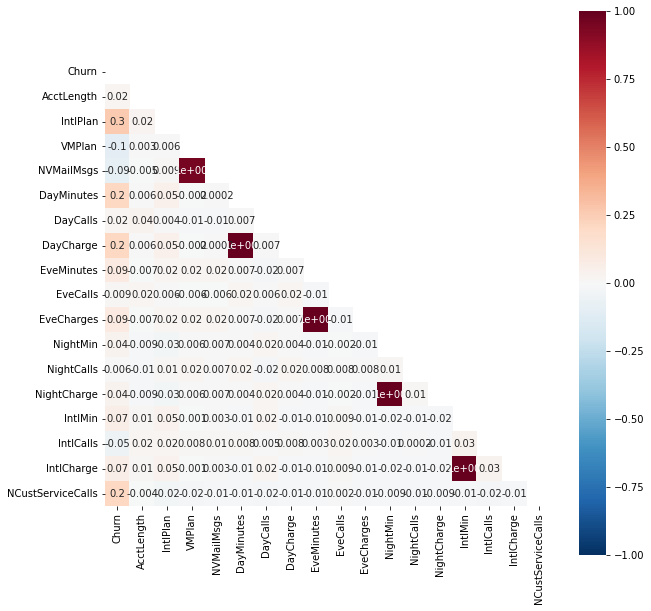

In [ ]:
data_corr=pd.DataFrame(data.corr())

plt.figure(figsize=(10,10))
mask = np.zeros_like(data_corr)
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(data=data_corr, mask=mask, square=True, cmap="RdBu_r", 
            norm = norm, annot = True,  fmt ='0.1') 

**Implication:**
It seems like most predictors are not correlated based on the corrlation heatmap above. But there are several predictors having correlation coefficients of 1, they are: 
  - Daycharge and DayMinutes
  - EveCharges and EveMinutes
  - NightCharge and NightMin
  - IntlCharge and IntlMin

Since charges are calcualted based on the time spent in different time periods in a day, it is not hard to conclude that those predictors above should have a strong linear correlation.

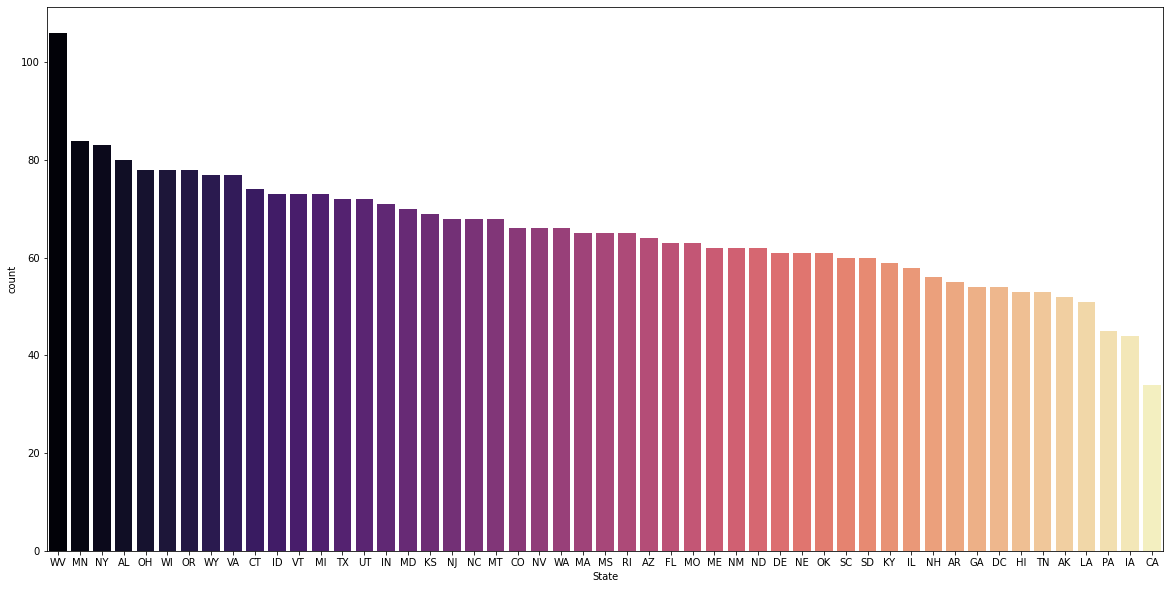

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'State', 
              data = data, 
              order = data['State'].value_counts().index, 
              palette='magma')
plt.show()

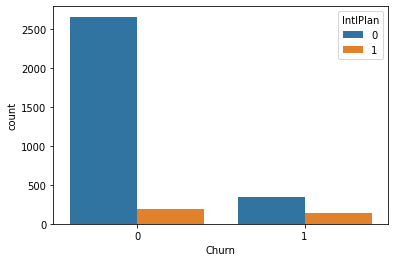

In [ ]:
sns.countplot(x = 'Churn', data = data, hue = 'IntlPlan')
plt.show()
# data['IntlPlan'].value_counts().plot(kind='bar')
# plt.title("Bar Chart of IntlPlan")

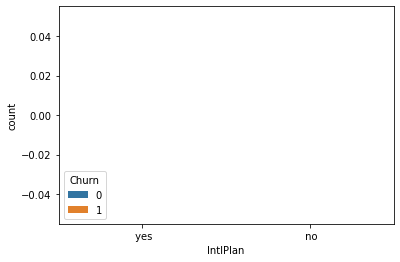

In [ ]:
# Transposing the previous chart to see the pattern: Within people with IntlPlan, the churn rate is higher than people without IntlPlan.
sns.countplot(x = 'IntlPlan', data = data, hue = 'Churn', order = [' yes', ' no'])
plt.show()

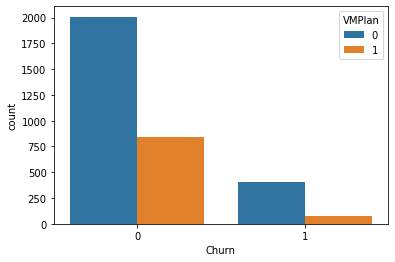

In [ ]:
sns.countplot(x = 'Churn', data = data, hue = 'VMPlan')
plt.show()
# data['VMPlan'].value_counts().plot(kind='bar')
# plt.title("Bar Chart of VMPlan")

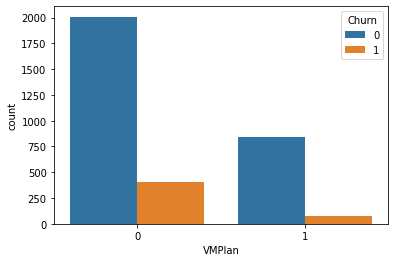

In [ ]:
sns.countplot(x = 'VMPlan', data = data, hue = 'Churn')
plt.show()

In [ ]:
data.drop(['DayMinutes','EveMinutes','NightMin','IntlMin'], axis = 1, inplace = True)

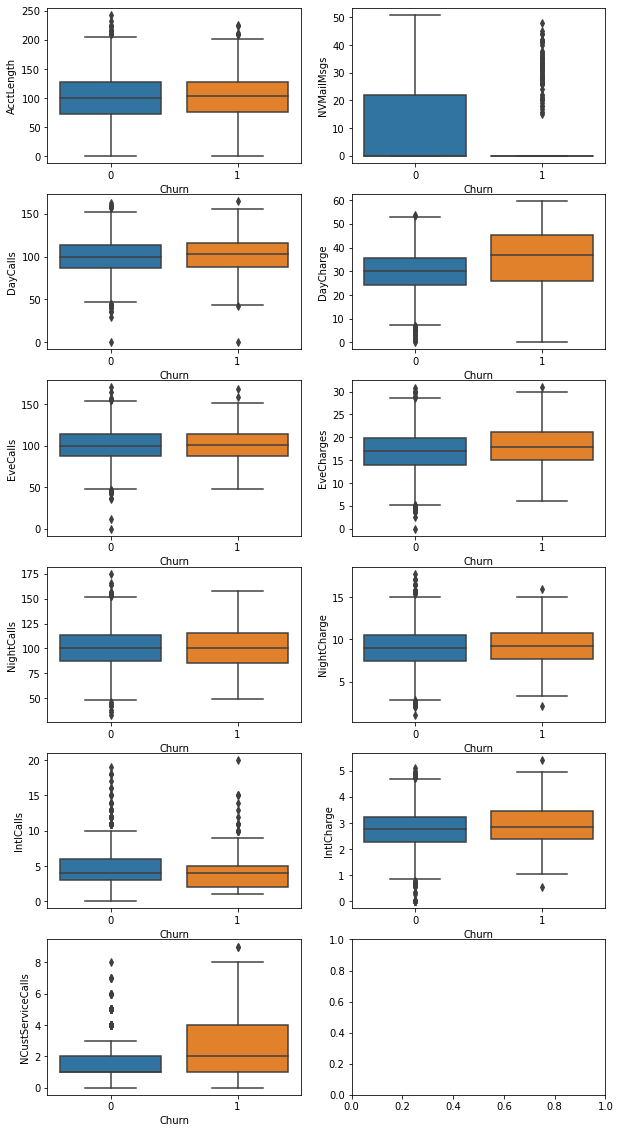

In [ ]:
# WANG Zichen
fig, axes = plt.subplots(6, 2, figsize=(10, 20))

sns.boxplot(ax = axes[0,0], x = 'Churn', y = 'AcctLength', data = data)

sns.boxplot(ax = axes[0,1], x = 'Churn', y = 'NVMailMsgs', data = data)

sns.boxplot(ax = axes[1,0], x = 'Churn', y = 'DayCalls', data = data)

sns.boxplot(ax = axes[1,1], x = 'Churn', y = 'DayCharge', data = data)

sns.boxplot(ax = axes[2,0], x = 'Churn', y = 'EveCalls', data = data)

sns.boxplot(ax = axes[2,1], x = 'Churn', y = 'EveCharges', data = data)

sns.boxplot(ax = axes[3,0], x = 'Churn', y = 'NightCalls', data = data)

sns.boxplot(ax = axes[3,1], x = 'Churn', y = 'NightCharge', data = data)

sns.boxplot(ax = axes[4,0], x = 'Churn', y = 'IntlCalls', data = data)

sns.boxplot(ax = axes[4,1], x = 'Churn', y = 'IntlCharge', data = data)

sns.boxplot(ax = axes[5,0], x = 'Churn', y = 'NCustServiceCalls', data = data)

plt.show()

# NVMailMsgs is skewed. -> Check scatterplot.

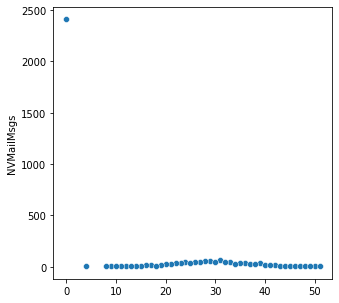

In [ ]:
# The distribution of NVMailMsgs is skewed.
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(data=data.NVMailMsgs.value_counts())
plt.show()

# PART II: Building Model


## 2.0 Train-test split

In [ ]:
train_set = data.iloc[:int(len(data)*0.8),]
test_set = data.iloc[int(len(data)*0.8):, ]

##2.1 First model (all variables, Logistic Regression) [Model1]
Check assumptions (residual - mean & variance, multicollinearity-VIF)


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
all_columns = "+".join(data.columns[1:])
my_formula="Churn~"+all_columns
full_model = smf.glm(formula = my_formula, data=train_set, family=sm.families.Binomial()).fit()
print(full_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2665
Model:                            GLM   Df Residuals:                     2601
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -821.08
Date:                Mon, 12 Dec 2022   Deviance:                       1642.2
Time:                        11:26:36   Pearson chi2:                 2.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -9.6268      1.10

In [ ]:
all_columns


'State+AcctLength+IntlPlan+VMPlan+NVMailMsgs+DayCalls+DayCharge+EveCalls+EveCharges+NightCalls+NightCharge+IntlCalls+IntlCharge+NCustServiceCalls'

## 2.2 Stepwise Selection - refit model [Model2]

in R

##2.3 Model 3

In [ ]:
my_formula3 = "Churn ~ IntlPlan + VMPlan + DayCharge + EveCharges + NightCharge + IntlCalls + IntlCharge + NCustServiceCalls"
model3 = smf.glm(formula = my_formula3, data=train_set, family=sm.families.Binomial()).fit()
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2665
Model:                            GLM   Df Residuals:                     2656
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.30
Date:                Mon, 12 Dec 2022   Deviance:                       1712.6
Time:                        11:26:36   Pearson chi2:                 2.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.9496      0.58

# PART III: Evaluation

Some parts contain in R in Colab

## 3.1 Goodness of Fit

(Done in R)

a.likelihood ratio test --- get a p-value = 5.725885e-92, reject H_0 and conclude that our model3 is useful.

b.Pseudo R-squared = 0.2077575

c.Is there a better model than this one : Deviance test --- get a p-value = 1, retain H_0 and conclude that our fitted model3 is good enough, there's no need to add interactive or higher-order term to the model.


##3.2 Predictive Power

### Confusion Matrix & Cutoff

In [ ]:
# To make sensitivity close to specificity, the threshold is very low (p=0.15). 
# In this way, the model tends to let more predictions fall into the scope of 'Churn'.
from sklearn.metrics import confusion_matrix

prob=model3.predict(test_set)

TN = pd.Series()
TP = pd.Series()
FN = pd.Series()
FP = pd.Series()

for n in [i/100 for i in range(0, 105, 5)]:
  predictions = [ 0 if p < n else 1 for p in prob]
  tn, fp, fn, tp = confusion_matrix(test_set["Churn"], predictions).ravel()
  TN[n] = tn
  TP[n] = tp
  FN[n] = fn
  FP[n] = fp

sensitivity = TP/(TP+FN)
specificity = TN/(FP+TN)
misClassError = (FP+FN)/(FP+FN+TN+TP)

Evaluations = pd.DataFrame({'sensitivity': sensitivity, 
                            'specificity': specificity, 
                            'misClassError': misClassError})


<ipython-input-353-63a6ac259515>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TN = pd.Series()
<ipython-input-353-63a6ac259515>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TP = pd.Series()
<ipython-input-353-63a6ac259515>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  FN = pd.Series()
<ipython-input-353-63a6ac259515>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  FP = pd.Series()


In [ ]:
Evaluations = Evaluations.reset_index().rename({'index': 'cutoff'}, axis = 1)
Evaluations

,cutoff,sensitivity,specificity,misClassError
0,0.00,1.000000,0.000000,0.836582
1,0.05,0.917431,0.419355,0.499250
2,0.10,0.853211,0.648746,0.317841
3,0.15,0.770642,0.788530,0.214393
4,0.20,0.660550,0.845878,0.184408
5,0.25,0.614679,0.892473,0.152924
6,0.30,0.522936,0.921147,0.143928
7,0.35,0.449541,0.942652,0.137931
8,0.40,0.348624,0.953405,0.145427
9,0.45,0.302752,0.965950,0.142429


### ROC

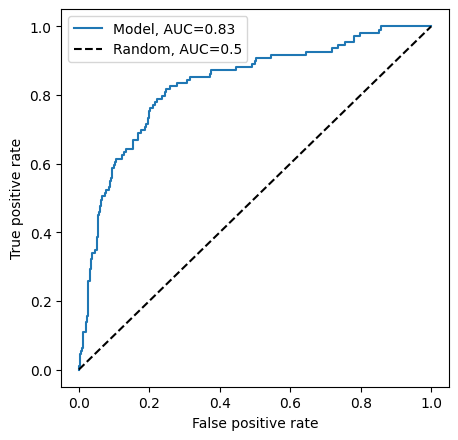

In [ ]:
# ROC Curve and AUC
from sklearn import metrics

y_pred_proba = prob
y_test=test_set['Churn']

fpr, tpr, possible_thresholds = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.auc(fpr, tpr)

# Plot Curve
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.plot(fpr, tpr, label = f"Model, AUC={auc:.2f}")
ax.plot([0,1],[0,1], '--', color='black', label='Random, AUC=0.5')
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.legend()

## 3.3 Further Analysis

In [ ]:
(test_set.DayCharge + test_set.EveCharges + test_set.NightCharge + test_set.IntlCharge).mean()

59.24232383808096

In [ ]:
# Value curve
# Assume the cost to retain customers is 20 dollars per month. 
# Assume customers will stay with the offer, will leave without offer.
base_size = 667

percentage_targeted = range(0, 101)
thresholds = np.percentile(y_pred_proba, list(reversed(percentage_targeted)))
identified_churns = []
profits = []
for t in thresholds:
    decisions = y_pred_proba > t
    identified_churn = y_test * decisions
    dollars = decisions * (y_test*(test_set.DayCharge + test_set.EveCharges + test_set.NightCharge + test_set.IntlCharge) - 20) 
    identified_churns.append(identified_churn.mean()*base_size)
    profits.append(dollars.mean()*base_size)

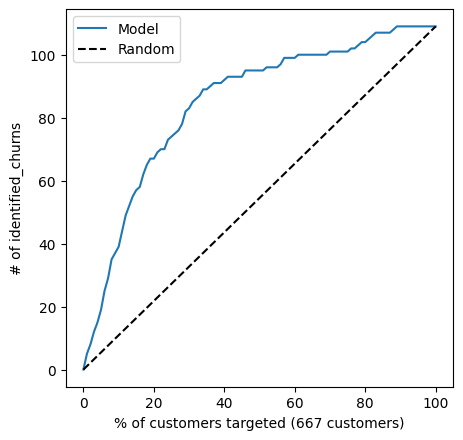

In [ ]:
# Cumulative response curve
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.plot(percentage_targeted, identified_churns, label=f"Model")
ax.plot([0, 100], [0, identified_churns[-1]], '--', color='black', label="Random")
ax.set_xlabel("% of customers targeted (667 customers)")
ax.set_ylabel("# of identified_churns")
ax.legend()

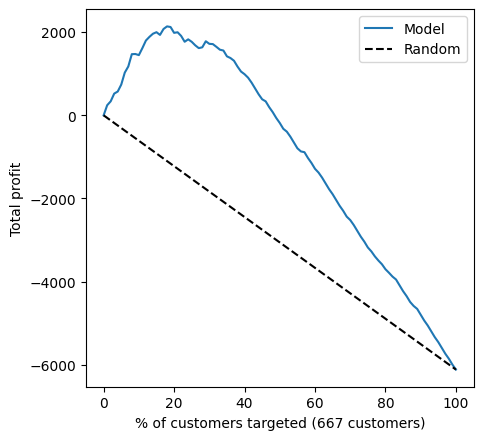

In [ ]:
# Cumulative profit curve
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.plot(percentage_targeted, profits, label=f"Model")
ax.plot([0, 100], [0, profits[-1]], '--', color='black', label="Random")
ax.set_xlabel("% of customers targeted (667 customers)")
ax.set_ylabel("Total profit")
ax.legend()

In [ ]:
position = np.argmax(profits)
best_threshold = thresholds[position]
best_profits = profits[position]
print(f"Best threshold: {best_threshold*100:.2f}%")
print(f"Expected profits: ${best_profits:,.2f}")

Best threshold: 26.44%
Expected profits: $2,140.19


In [ ]:
# The result is quite consistent with close sensitivity and specificity method.
np.percentile(y_pred_proba, (100-26.44))

0.1811250069564155

In [ ]:
prob = model3.predict(test_set)

TN1 = pd.Series()
TP1 = pd.Series()
FN1 = pd.Series()
FP1 = pd.Series()

for n in [0.15, 0.16, 0.17, 0.18]:
  predictions = [ 0 if p < n else 1 for p in prob]
  tn, fp, fn, tp = confusion_matrix(test_set["Churn"], predictions).ravel()
  TN1[n] = tn
  TP1[n] = tp
  FN1[n] = fn
  FP1[n] = fp

sensitivity1 = TP1/(TP1+FN1)
specificity1 = TN1/(FP1+TN1)
misClassError1 = (FP1+FN1)/(FP1+FN1+TN1+TP1)

Evaluations1 = pd.DataFrame({'sensitivity': sensitivity1, 
                            'specificity': specificity1, 
                            'misClassError': misClassError1})
Evaluations1 = Evaluations1.reset_index().rename({'index': 'cutoff'}, axis = 1)
Evaluations1

<ipython-input-362-0b9da856cf7e>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TN1 = pd.Series()
<ipython-input-362-0b9da856cf7e>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TP1 = pd.Series()
<ipython-input-362-0b9da856cf7e>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  FN1 = pd.Series()
<ipython-input-362-0b9da856cf7e>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  FP1 = pd.Series()


,cutoff,sensitivity,specificity,misClassError
0,0.15,0.770642,0.788530,0.214393
1,0.16,0.752294,0.801075,0.206897
2,0.17,0.715596,0.810036,0.205397
3,0.18,0.697248,0.818996,0.200900


In [ ]:
y_pred_proba

2665    0.694264
2666    0.081145
2667    0.014725
2668    0.031213
2669    0.040709
          ...   
3327    0.042592
3328    0.217844
3329    0.226790
3330    0.252352
3331    0.087069
Length: 667, dtype: float64

# PART IV: Prediction and Summary

## Standardized coefficients

In [ ]:
model_f = smf.glm(formula = my_formula3, data=data, family=sm.families.Binomial()).fit()
print(model_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3332
Model:                            GLM   Df Residuals:                     3323
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1082.6
Date:                Mon, 12 Dec 2022   Deviance:                       2165.3
Time:                        11:26:37   Pearson chi2:                 3.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -8.0495      0.51

In [ ]:
coef = pd.DataFrame({'coef': model_f.params[1:]})
coef.rename({'IntlPlan[T. yes]': 'IntlPlan', 'VMPlan[T. yes]': 'VMPlan'}, inplace = True)
coef

,coef
IntlPlan,2.041353
VMPlan,-0.936289
DayCharge,0.076539
EveCharges,0.084278
NightCharge,0.081568
IntlCalls,-0.091510
IntlCharge,0.323891
NCustServiceCalls,0.512417


In [ ]:
data1 = data[list(coef.index)]
data1.replace([' yes', ' no'], [1, 0], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
coef['std'] = data1.std()

In [ ]:
coef['adj_coef'] = coef['coef'] * coef['std']
coef['exp(coef)'] = coef['coef'].map(np.exp)
coef['exp(adj_coef)'] = coef['adj_coef'].map(np.exp)

In [ ]:
coef

,coef,std,adj_coef,exp(coef),exp(adj_coef)
IntlPlan,2.041353,0.295919,0.604075,7.701020,1.829558
VMPlan,-0.936289,0.447289,-0.418792,0.392080,0.657841
DayCharge,0.076539,9.257411,0.708555,1.079545,2.031054
EveCharges,0.084278,4.311311,0.363348,1.087931,1.438137
NightCharge,0.081568,2.275958,0.185646,1.084987,1.203995
IntlCalls,-0.091510,2.461450,-0.225248,0.912552,0.798318
IntlCharge,0.323891,0.753885,0.244177,1.382497,1.276570
NCustServiceCalls,0.512417,1.315652,0.674163,1.669321,1.962389
